## LSTM Sample 3 - Sin diff learning


In [4]:
import numpy as np # linear algebra
import pandas # data processing, CSV file I/O (e.g. pandas.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Lambda, Flatten, LSTM
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam, RMSprop
from keras.utils import np_utils

Create a one dimensional array to represent the time series data. Then reformat it for LSTM.
See https://machinelearningmastery.com/reshape-input-data-long-short-term-memory-networks-keras/ for details.

np.arrange generates numbers between 0 andt the number of samples
np.linspace(start value, end value, number of values

In [6]:
numberSamples = 1000
numericSamples = np.arange(numberSamples)
timeSamples = np.linspace(0,20,numberSamples)
print (numericSamples.shape)
print (numericSamples[:10])
print (timeSamples.shape)
print (timeSamples[:10])
sinSamples = np.sin(timeSamples)
print (sinSamples[:10])

(1000,)
[0 1 2 3 4 5 6 7 8 9]
(1000,)
[0.         0.02002002 0.04004004 0.06006006 0.08008008 0.1001001
 0.12012012 0.14014014 0.16016016 0.18018018]
[0.         0.02001868 0.04002934 0.06002396 0.07999452 0.09993302
 0.11983146 0.13968188 0.15947632 0.17920684]


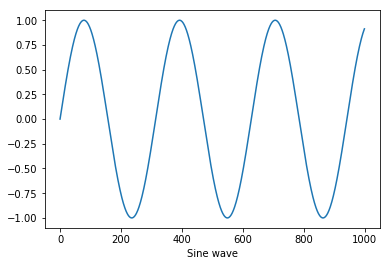

In [7]:
from matplotlib import pyplot as plt
plt.plot(sinSamples)
#plt.ylabel('some numbers')
plt.xlabel('Sine wave')
plt.show()

In [9]:
# split into train and test sets
train_size = int(len(sinSamples) * 0.70)
test_size = len(sinSamples) - train_size
sin_train = sinSamples[0:train_size]
sin_test  = sinSamples[train_size:len(sinSamples)]
print ("train shape : " , sin_train.shape)
print ("test shape : " , sin_test.shape)




train shape :  (700,)
test shape :  (300,)


The above sets up the 1-d sin data for input into a LSTM system 


In [10]:
def to_sequences(seq_size, obs):
    x = []
    y = []

    for i in range(len(obs)-SEQUENCE_SIZE-1):
        #print(i)
        window = obs[i:(i+SEQUENCE_SIZE)]
        after_window = obs[i+SEQUENCE_SIZE]
        window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(window)
        y.append(after_window)
        
    return np.array(x),np.array(y)
    

In [11]:

# Train with sequences of 10 predict 1 ahead


In [15]:
SEQUENCE_SIZE = 10
x_train,y_train = to_sequences(SEQUENCE_SIZE,sin_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,sin_test)

print("Shape of training set: {}".format(x_train.shape))
print("Shape of test set: {}".format(x_test.shape))
print("Shape of training output: {}".format(y_train.shape))
print("Shape of test outpuy: {}".format(y_test.shape))

Shape of training set: (689, 10, 1)
Shape of test set: (289, 10, 1)
Shape of training output: (689,)
Shape of test outpuy: (289,)


In [14]:
y_train

array([ 0.19886554,  0.21844453,  0.23793597,  0.25733206,  0.276625  ,
        0.29580708,  0.3148706 ,  0.33380793,  0.35261147,  0.37127369,
        0.3897871 ,  0.4081443 ,  0.42633791,  0.44436066,  0.46220531,
        0.47986471,  0.49733179,  0.51459954,  0.53166105,  0.54850948,
        0.56513807,  0.58154016,  0.59770917,  0.61363863,  0.62932216,
        0.64475345,  0.65992634,  0.67483474,  0.68947267,  0.70383427,
        0.71791378,  0.73170556,  0.74520409,  0.75840394,  0.77129983,
        0.7838866 ,  0.7961592 ,  0.8081127 ,  0.81974232,  0.8310434 ,
        0.84201141,  0.85264195,  0.86293076,  0.87287371,  0.88246684,
        0.89170627,  0.90058833,  0.90910944,  0.91726619,  0.92505531,
        0.93247368,  0.93951832,  0.94618642,  0.9524753 ,  0.95838244,
        0.96390547,  0.96904217,  0.9737905 ,  0.97814855,  0.98211456,
        0.98568695,  0.9888643 ,  0.99164532,  0.9940289 ,  0.99601408,
        0.99760007,  0.99878624,  0.99957211,  0.99995736,  0.99

In [ ]:
print('Build model...')
model = Sequential()
model.add(LSTM(64, input_shape=(None, 1)))
model.add(Dense(32))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

#monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
print('Train...')



In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),verbose=2,epochs=100)

In [ ]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)


In [ ]:
from matplotlib import pyplot as plt
# plot baseline and predictions
plt.plot(sinSamples, linestyle=':')

plt.plot(trainPredict)
list = np.arange(len(trainPredict)+10,len(trainPredict)+len(testPredict)+10)
plt.plot(list,testPredict)